<a href="https://colab.research.google.com/github/kebabee/ML-assiociative-memory/blob/main/mean_patterns_associative_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import requests
import zipfile
from io import BytesIO
from PIL import Image
import random
import tensorflow as tf

# Define the URL of the raw hopfield_header.py file
hopfield_url = "https://raw.githubusercontent.com/kebabee/ML-assiociative-memory/bfa215afd00124cf2c32b26aea42381588e75982/hopfield_header.py"

# Download the hopfield_header.py file
response = requests.get(hopfield_url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content to hopfield_header.py
    with open('hopfield_header.py', 'wb') as f:
        f.write(response.content)
    print("hopfield_header.py downloaded successfully.")
else:
    print("Failed to download hopfield_header.py.")


import hopfield_header as hopf

hopfield_header.py downloaded successfully.


# Classification by average digit pattern

Concept: What would happen if we find "average" MNIST digits based on training dataset and let associative memory classify test examples?

Average digit would be a mean of corresponding pixels in every digit example. Thus we have 10 average digits to use as patterns in Modern Hopfield Network.


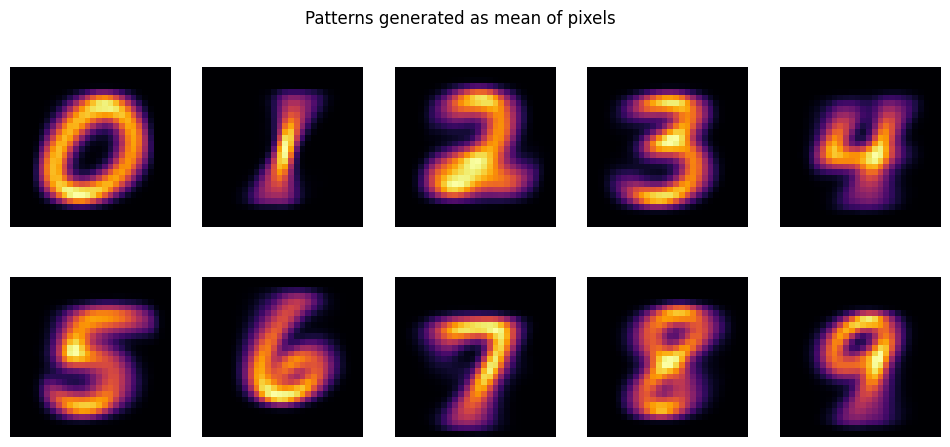

In [34]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

unique_labels = np.unique(train_labels)

valid1 = []

for i in range(4065,5420):
  temp = []
  for label in unique_labels:
    label_indices = np.where(train_labels == label)[0]
    selected_image = train_images[label_indices[i]]
    selected_image = selected_image.reshape(-1)  #reshape macierzy na wektor
    temp.append(selected_image)
  valid1.append(temp)

train1 = []

for i in range(4065):
  temp = []
  for label in unique_labels:
    label_indices = np.where(train_labels == label)[0]
    selected_image = train_images[label_indices[i]]
    selected_image = selected_image.reshape(-1)  #reshape macierzy na wektor
    temp.append(selected_image)
  train1.append(temp)

pattern_images = []
for i in range(10):
  pattern_images.append(np.zeros(784))

for idx in range(0,4065):

  test0 = []

  for label in unique_labels:
    label_indices = np.where(train_labels == label)[0]
    selected_image = train_images[label_indices[idx]]
    selected_image = selected_image.reshape(-1)  #reshape macierzy na wektor
    test0.append(selected_image)

  for i in range(10):
    for j in range(784):
      pattern_images[i][j] += test0[i][j]/4065


fig, axes = plt.subplots(2, 5, figsize=(12,5))
for i in range(10):
  row, col = i // 5, i % 5  # Oblicz indeksy rzędu i kolumny
  axes[row, col].imshow(pattern_images[i].reshape(28, 28), cmap='inferno')
  axes[row, col].axis('off')  # Wyłącz podpisy osi

plt.suptitle('Patterns generated as mean of pixels')
plt.show()

The accuracy of clasification by minimizing energy to generated patterns:

In [36]:
network1 = hopf.hopfield_net(784)
network1.set_patterns(pattern_images)
beta = 10
numOfTest = 0
score = 0

for i in range(len(valid1)):
    for j in range(10):
        result, index = network1.hopfield_layer(valid1[i][j], beta)
        numOfTest += 1
        if index == j:
            score += 1

print(f"Accuracy for test dataset: {score/numOfTest * 100:.3f}%")

Accuracy for test dataset: 58.399%


In [37]:
numOfTest = 0
score = 0

for i in range(len(train1)):
    for j in range(10):
        result, index = network1.hopfield_layer(train1[i][j], beta)
        numOfTest += 1
        if index == j:
            score += 1

print(f"Accuracy for train dataset: {score/numOfTest * 100:.3f}%")

Accuracy for train dataset: 57.892%


Few result examples:

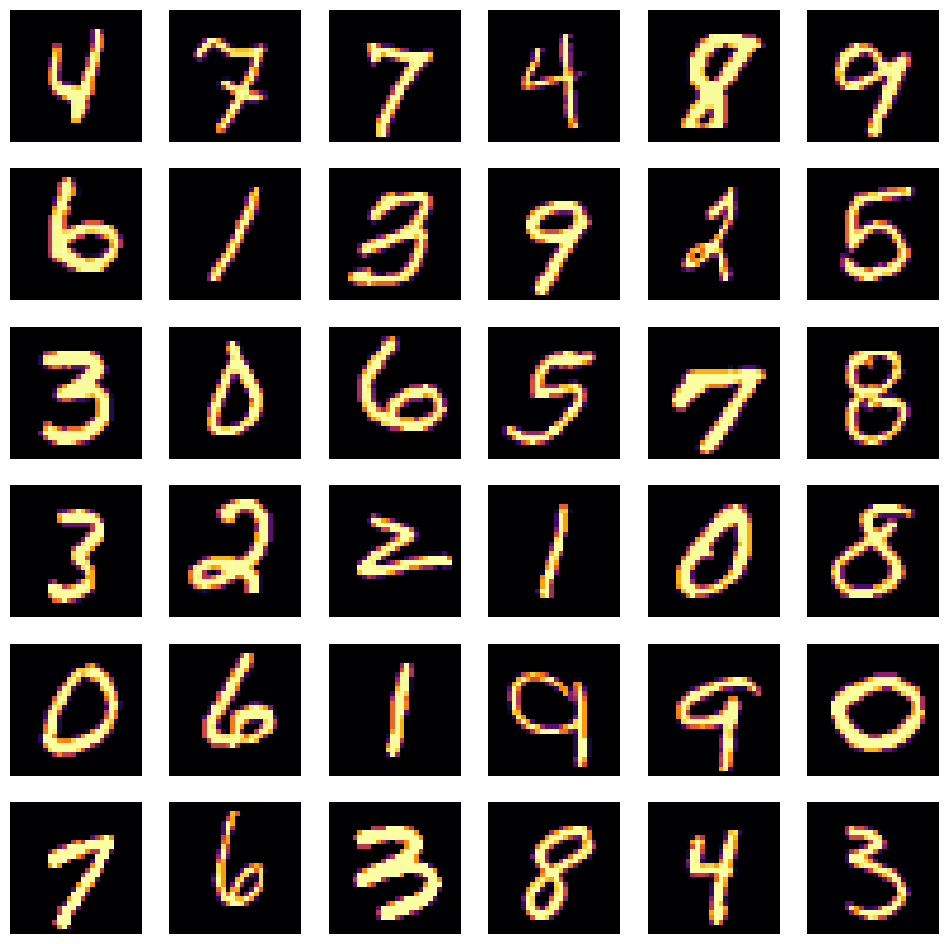

In [41]:
valid = []

for _ in range(4):
  for label in unique_labels:
      label_indices = np.where(train_labels == label)[0]
      selected_image = train_images[label_indices[random.randint(0,5420)]]
      selected_image = selected_image.reshape(-1)  #reshape macierzy na wektor
      valid.append(selected_image)

random.shuffle(valid)

fig, axes = plt.subplots(6, 6, figsize=(12,12))
for i in range(36):
    row, col = i // 6, i % 6  # Oblicz indeksy rzędu i kolumny
    axes[row, col].imshow(valid[i].reshape(28, 28), cmap="inferno")
    axes[row, col].axis('off')  # Wyłącz podpisy osi
plt.show()

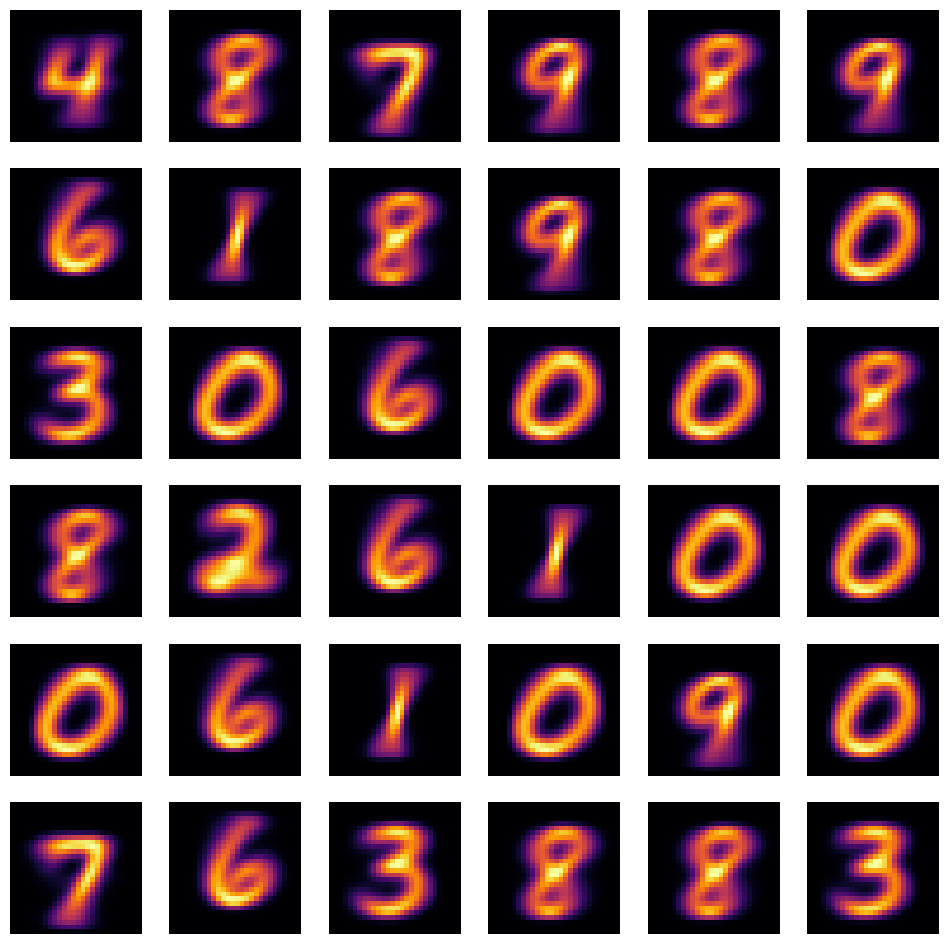

In [42]:
fig, axes = plt.subplots(6, 6, figsize=(12,12))
for i in range(36):
    result, index = network1.hopfield_layer(valid[i], beta)
    row, col = i // 6, i % 6
    axes[row, col].imshow(result.reshape(28, 28), cmap="inferno")
    axes[row, col].axis('off')

plt.show()